In [21]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [22]:
look_back = 8

In [23]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)
df = df.resample(rule='15T', closed='left', label='left').mean().apply(np.ceil)
type(df)

pandas.core.frame.DataFrame

In [24]:

df["timestamp"] = df.index

parking_data = df["value"].values
parking_data = parking_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(parking_data))

parking_train = parking_data[:split]
parking_test = parking_data[split:]

date_train = df["timestamp"][:split]
date_test = df["timestamp"][split:]

df["value"].values


array([3., 3., 3., ..., 5., 5., 5.])

In [25]:
train_generator = TimeseriesGenerator(parking_train, parking_train, length=look_back, batch_size=5)
test_generator = TimeseriesGenerator(parking_test, parking_test, length=look_back, batch_size=1)


In [26]:
model = Sequential()

model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

num_epochs = 25

model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 2/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 3/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 5/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 6/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 7/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 8/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 9/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 10/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 11/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 12/25
484/484 [==============================] - 1s 2ms/step - loss: nan
Epoch 13/25
484/484 [==============================] - 1s 2ms

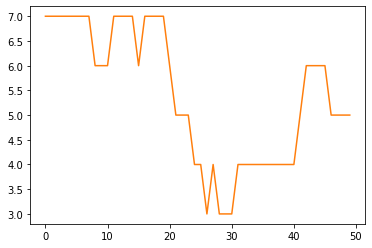

In [27]:
prediction = model.predict(test_generator)

parking_train = parking_train.reshape((-1))
parking_test = parking_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.plot(date_test[:50], prediction[:50])
plt.plot(date_test[:50], parking_test[:50])
plt.show()